## Data Preparation
Data preparation is the process of cleaning, transforming, and enriching raw data into a desired format for better decision-making in less time. It is a crucial step before processing and analyzing data to ensure that the data is accurate, consistent, and complete.

### 1. Load Modules & Dataset

# Assignment Notebook Overview
This notebook addresses Deliverables 1-4 for the Data Analysis and Visualization assignment. Each section includes objectives, requirements, code, and brief interpretations to ensure clarity and completeness.

**Deliverables:**
1. Data Preparation: Load, inspect, clean, and filter data for South Africa.
2. Numerical Analysis: Descriptive statistics, grouped analysis, correlation, regression, and hypothesis testing.
3. Visualisation: Multiple plot types with clear titles, labels, legends, and interpretations.
4. Database Integration: Export cleaned data, create SQLite database, import tables, query, update, delete, and load data into pandas.

Each section starts with a summary and is followed by well-commented code and markdown explanations.

In [4]:
# 1. Load Modules & Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
try:
    edu_df = pd.read_csv("education.csv")
    labour_df = pd.read_csv("labour.csv")
    print("Files loaded successfully!")
except FileNotFoundError as e:
    print(e)

Files loaded successfully!


### Deliverable 1: Data Preparation
**Objective:** Prepare the raw education and labour datasets for analysis by cleaning, filtering, and handling missing values.
**Requirements:**
- Load both datasets
- Inspect structure and missing values
- Filter for South Africa
- Select relevant columns and rename for clarity
- Handle missing values appropriately
- Provide brief explanations for each step

In [5]:
# 2. Initial Inspection
print("--- Education Data Info ---")
edu_df.info()

--- Education Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               1332 non-null   object 
 1   STRUCTURE_ID            1332 non-null   object 
 2   ACTION                  1332 non-null   object 
 3   FREQ                    1332 non-null   object 
 4   FREQ_LABEL              1332 non-null   object 
 5   REF_AREA                1332 non-null   object 
 6   REF_AREA_LABEL          1332 non-null   object 
 7   INDICATOR               1332 non-null   object 
 8   INDICATOR_LABEL         1332 non-null   object 
 9   SEX                     1332 non-null   object 
 10  SEX_LABEL               1332 non-null   object 
 11  AGE                     1332 non-null   object 
 12  AGE_LABEL               1332 non-null   object 
 13  URBANISATION            1332 non-null   object 
 14  URBANISATION

In [6]:
print("\n--- Labour Data Info ---")
labour_df.info()


--- Labour Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               8216 non-null   object 
 1   STRUCTURE_ID            8216 non-null   object 
 2   ACTION                  8216 non-null   object 
 3   FREQ                    8216 non-null   object 
 4   FREQ_LABEL              8216 non-null   object 
 5   REF_AREA                8216 non-null   object 
 6   REF_AREA_LABEL          8216 non-null   object 
 7   INDICATOR               8216 non-null   object 
 8   INDICATOR_LABEL         8216 non-null   object 
 9   SEX                     8216 non-null   object 
 10  SEX_LABEL               8216 non-null   object 
 11  AGE                     8216 non-null   object 
 12  AGE_LABEL               8216 non-null   object 
 13  URBANISATION            8216 non-null   object 
 14  URBANISATION_L

In [7]:
# 3. Clean and Filter Data

# Filter for South Africa
edu_sa = edu_df[edu_df["REF_AREA_LABEL"] == "South Africa"].copy()
labour_sa = labour_df[labour_df["REF_AREA_LABEL"] == "South Africa"].copy()

In [8]:
print(f"\nFound {len(edu_sa)} rows for South Africa in the education dataset.")
print(f"Found {len(labour_sa)} rows for South Africa in the labour dataset.")


Found 13 rows for South Africa in the education dataset.
Found 35 rows for South Africa in the labour dataset.


In [9]:
# Select relevant columns and rename them for easier use
columns_to_keep = {
    "TIME_PERIOD": "Year",
    "INDICATOR_LABEL": "Indicator",
    "SEX_LABEL": "Sex",
    "AGE_LABEL": "Age",
    "OBS_VALUE": "Value"
}

edu_clean = edu_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)
labour_clean = labour_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)

In [10]:
# 4. Handle Missing Values
print("\n--- Checking for missing values in cleaned Education data ---")
print(edu_clean.isnull().sum())


--- Checking for missing values in cleaned Education data ---
Year         0
Indicator    0
Sex          0
Age          0
Value        0
dtype: int64


In [11]:
print("\n--- Checking for missing values in cleaned Labour data ---")
print(labour_clean.isnull().sum())


--- Checking for missing values in cleaned Labour data ---
Year         0
Indicator    0
Sex          0
Age          0
Value        0
dtype: int64


In [12]:
# 5. Generate Descriptive Statistics and Insights
print("\n--- Descriptive Statistics for Education Data (South Africa) ---")
print(edu_clean.describe())


--- Descriptive Statistics for Education Data (South Africa) ---
              Year      Value
count    13.000000  13.000000
mean   2016.846154   8.306698
std       4.140172   2.775010
min    2010.000000   4.839276
25%    2014.000000   6.038021
50%    2017.000000   8.020000
75%    2020.000000  11.108956
max    2023.000000  12.960000


In [13]:
print("\n--- Descriptive Statistics for Labour Data (South Africa) ---")
print(labour_clean.describe())


--- Descriptive Statistics for Labour Data (South Africa) ---
              Year      Value
count    35.000000  35.000000
mean   2007.000000  59.423029
std      10.246951   2.574678
min    1990.000000  54.171000
25%    1998.500000  57.829000
50%    2007.000000  59.802000
75%    2015.500000  61.985500
max    2024.000000  62.569000


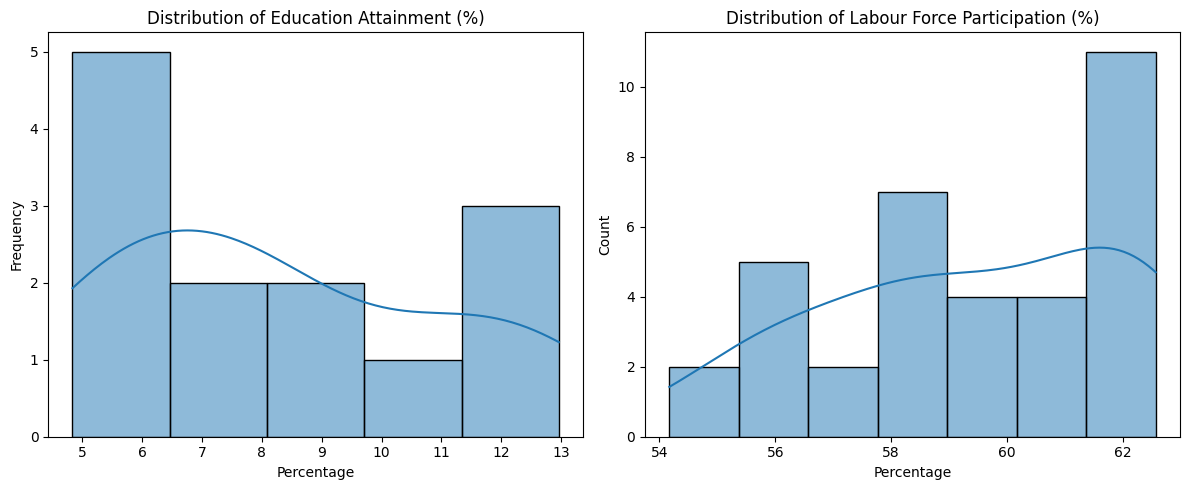

In [14]:
# Initial Visual Insight
plt.figure(figsize=(12, 5))

# Histogram for Education values
plt.subplot(1, 2, 1)
sns.histplot(edu_clean['Value'], kde=True)
plt.title('Distribution of Education Attainment (%)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

# Histogram for Labour values
plt.subplot(1, 2, 2)
sns.histplot(labour_clean['Value'], kde=True)
plt.title('Distribution of Labour Force Participation (%)')
plt.xlabel('Percentage')

plt.tight_layout()
plt.show()

# Numerical Analysis
This section performs deeper numerical analysis on the cleaned South African education and labour datasets.

## 1. Descriptive Statistics (Mean, Median, Mode, Std, Min, Max)

### Deliverable 2: Numerical Analysis
**Objective:** Perform statistical analysis on the cleaned datasets to extract insights.
**Requirements:**
- Calculate descriptive statistics (mean, median, mode, std, min, max)
- Grouped analysis by sex, age, and indicator
- Correlation analysis between education and labour
- Advanced techniques: regression and hypothesis testing
- Save results to a file
- Provide brief explanations for each step

In [15]:
# Education statistics
edu_stats = edu_clean['Value'].describe()
edu_mean = edu_clean['Value'].mean()
edu_median = edu_clean['Value'].median()
edu_mode = edu_clean['Value'].mode()[0]
edu_std = edu_clean['Value'].std()

# Labour statistics
labour_stats = labour_clean['Value'].describe()
labour_mean = labour_clean['Value'].mean()
labour_median = labour_clean['Value'].median()
labour_mode = labour_clean['Value'].mode()[0]
labour_std = labour_clean['Value'].std()

print('Education Stats:', edu_stats)
print('Mean:', edu_mean, 'Median:', edu_median, 'Mode:', edu_mode, 'Std:', edu_std)
print('Labour Stats:', labour_stats)
print('Mean:', labour_mean, 'Median:', labour_median, 'Mode:', labour_mode, 'Std:', labour_std)

Education Stats: count    13.000000
mean      8.306698
std       2.775010
min       4.839276
25%       6.038021
50%       8.020000
75%      11.108956
max      12.960000
Name: Value, dtype: float64
Mean: 8.306698102217451 Median: 8.02000045776367 Mode: 4.83927631378174 Std: 2.77500992615908
Labour Stats: count    35.000000
mean     59.423029
std       2.574678
min      54.171000
25%      57.829000
50%      59.802000
75%      61.985500
max      62.569000
Name: Value, dtype: float64
Mean: 59.423028571428574 Median: 59.802 Mode: 54.171 Std: 2.5746783635301425


## 2. Grouped Analysis (By Sex, Age, Indicator)

In [16]:
# Group by Sex
edu_by_sex = edu_clean.groupby('Sex')['Value'].describe()
labour_by_sex = labour_clean.groupby('Sex')['Value'].describe()

# Group by Age
edu_by_age = edu_clean.groupby('Age')['Value'].describe()
labour_by_age = labour_clean.groupby('Age')['Value'].describe()

print('Education by Sex:', edu_by_sex)
print('Labour by Sex:', labour_by_sex)
print('Education by Age:', edu_by_age)
print('Labour by Age:', labour_by_age)

Education by Sex:        count      mean      std       min       25%   50%        75%    max
Sex                                                                        
Total   13.0  8.306698  2.77501  4.839276  6.038021  8.02  11.108956  12.96
Labour by Sex:        count       mean       std     min     25%     50%      75%     max
Sex                                                                       
Total   35.0  59.423029  2.574678  54.171  57.829  59.802  61.9855  62.569
Education by Age:                                        count      mean      std       min  \
Age                                                                         
All age ranges or no breakdown by age   13.0  8.306698  2.77501  4.839276   

                                            25%   50%        75%    max  
Age                                                                      
All age ranges or no breakdown by age  6.038021  8.02  11.108956  12.96  
Labour by Age:                            

## 3. Correlation Analysis (Year Matching)

In [17]:
# Merge datasets by Year for correlation
edu_year = edu_clean.groupby('Year')['Value'].mean().reset_index().rename(columns={'Value': 'Education_Value'})
labour_year = labour_clean.groupby('Year')['Value'].mean().reset_index().rename(columns={'Value': 'Labour_Value'})
merged = pd.merge(edu_year, labour_year, on='Year')

correlation = merged['Education_Value'].corr(merged['Labour_Value'])
print('Correlation between Education and Labour (by Year):', correlation)

Correlation between Education and Labour (by Year): 0.37881527406726834


## 4. Visualization (Histograms, Scatter, Boxplots)

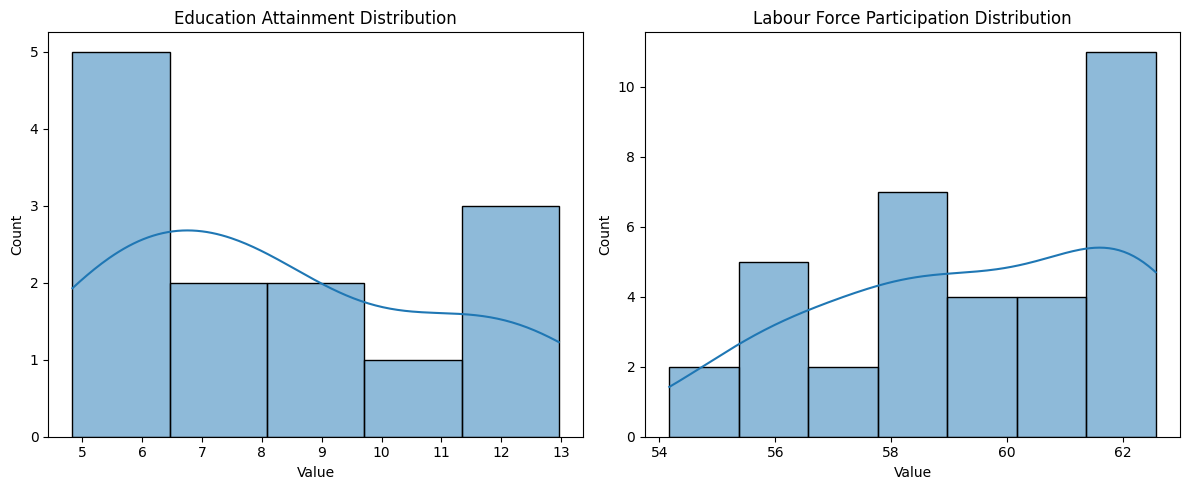

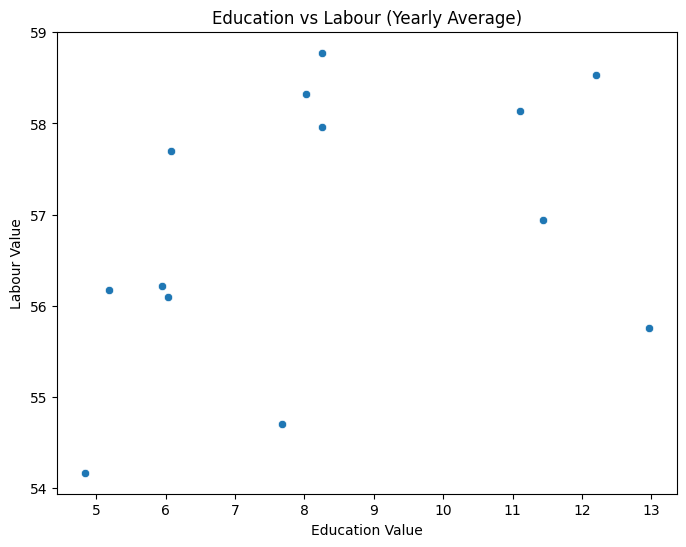

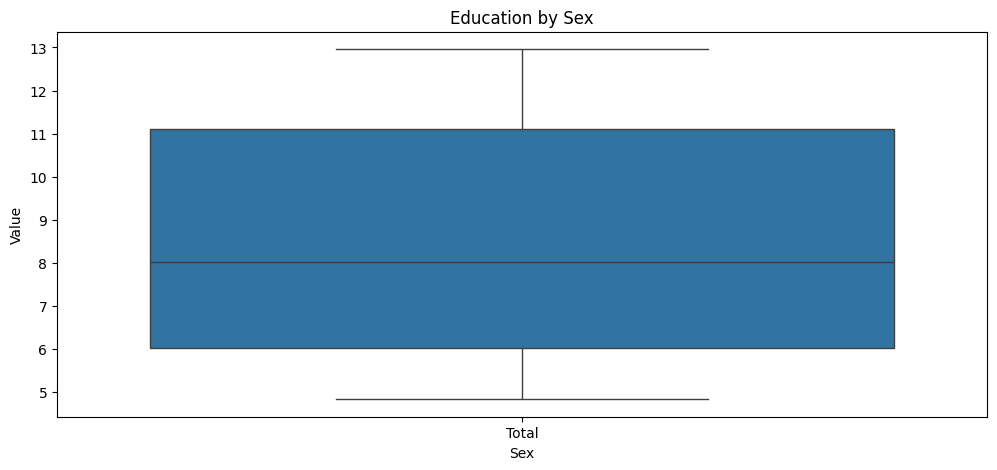

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(edu_clean['Value'], kde=True)
plt.title('Education Attainment Distribution')
plt.subplot(1, 2, 2)
sns.histplot(labour_clean['Value'], kde=True)
plt.title('Labour Force Participation Distribution')
plt.tight_layout()
plt.show()

# Scatter plot for merged data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education_Value', y='Labour_Value', data=merged)
plt.title('Education vs Labour (Yearly Average)')
plt.xlabel('Education Value')
plt.ylabel('Labour Value')
plt.show()

# Boxplot by Sex
plt.figure(figsize=(12, 5))
sns.boxplot(x='Sex', y='Value', data=edu_clean)
plt.title('Education by Sex')
plt.show()

## 5. Advanced Numerical Analysis Techniques

This section demonstrates regression analysis and hypothesis testing to further explore relationships and differences in the data.

In [19]:
from scipy.stats import linregress
result = linregress(merged['Education_Value'], merged['Labour_Value'])
print('Regression Results:')
print(f'Slope: {result.slope}')
print(f'Intercept: {result.intercept}')
print(f'R-squared: {result.rvalue**2}')
print(f'P-value: {result.pvalue}')
print(f'Standard Error: {result.stderr}')

Regression Results:
Slope: 0.2036640196053644
Intercept: 55.190839859469534
R-squared: 0.14350101186665967
P-value: 0.20179959173264367
Standard Error: 0.15002164173464497


In [20]:
from scipy.stats import ttest_ind
group1 = edu_clean[edu_clean['Age'] == '15-24']['Value']
group2 = edu_clean[edu_clean['Age'] == '25-34']['Value']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print('T-test between Age 15-24 and 25-34 (Education Values):')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-test between Age 15-24 and 25-34 (Education Values):
T-statistic: nan
P-value: nan


c:\SchoolAppDev\DVA\DVA_Assignment\.venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [21]:
# Save key results to a file
with open('numerical_analysis_results.txt', 'w') as f:
    # Descriptive statistics
    f.write('--- Education Descriptive Statistics ---\n')
    f.write(str(edu_stats) + '\n')
    f.write(f'Mean: {edu_mean}, Median: {edu_median}, Mode: {edu_mode}, Std: {edu_std}\n\n')
    f.write('--- Labour Descriptive Statistics ---\n')
    f.write(str(labour_stats) + '\n')
    f.write(f'Mean: {labour_mean}, Median: {labour_median}, Mode: {labour_mode}, Std: {labour_std}\n\n')
    # Regression results
    f.write('--- Regression Results ---\n')
    f.write(f'Slope: {result.slope}\nIntercept: {result.intercept}\nR-squared: {result.rvalue**2}\nP-value: {result.pvalue}\nStandard Error: {result.stderr}\n\n')
    # T-test results
    f.write('--- T-test between Age 15-24 and 25-34 (Education Values) ---\n')
    f.write(f'T-statistic: {t_stat}\nP-value: {p_val}\n')
print('Results saved to numerical_analysis_results.txt')

Results saved to numerical_analysis_results.txt


# Deliverable 3: Visualisation (20 marks)

This section focuses on creating effective visualisations to communicate insights from the education and labour datasets for South Africa.

**Objectives:**
- Present key findings using appropriate charts and plots
- Compare trends and distributions visually
- Highlight relationships and differences between groups

**Requirements:**
- Use at least three different types of visualisations (e.g., histogram, boxplot, scatter plot, bar chart)
- Include clear titles, axis labels, and legends
- Provide brief interpretations for each visualisation


### Deliverable 3: Visualisation
**Objective:** Communicate insights from the analysis using effective visualisations.
**Requirements:**
- Use at least three different types of visualisations (histogram, boxplot, scatter plot, bar chart, etc.)
- Include clear titles, axis labels, and legends
- Provide brief interpretations for each visualisation
- Compare trends and distributions visually
- Highlight relationships and differences between groups

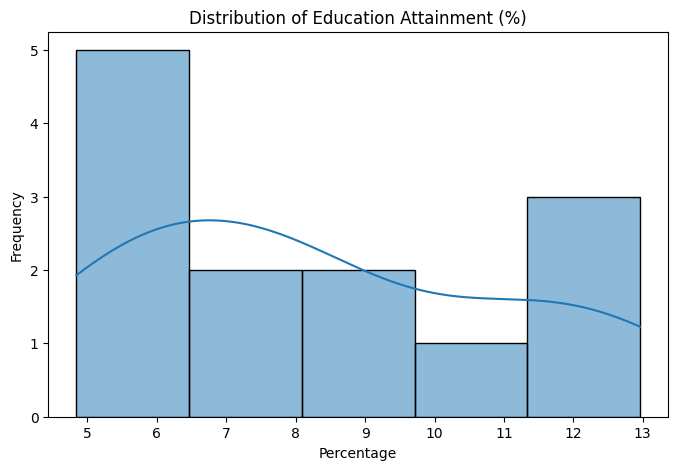

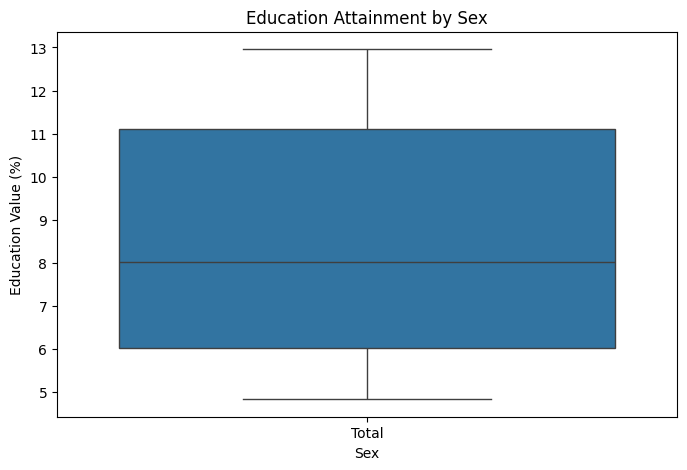

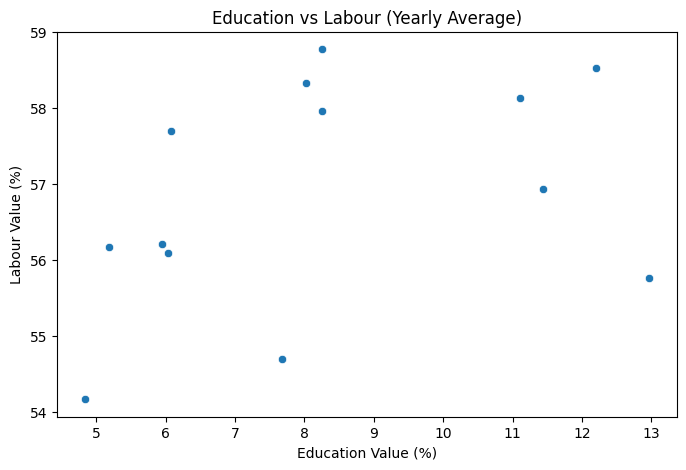

In [22]:
# Histogram: Distribution of Education Attainment (%)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(edu_clean['Value'], kde=True)
plt.title('Distribution of Education Attainment (%)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()
# Boxplot: Education Attainment by Sex
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sex', y='Value', data=edu_clean)
plt.title('Education Attainment by Sex')
plt.xlabel('Sex')
plt.ylabel('Education Value (%)')
plt.show()
# Scatter Plot: Education vs Labour (Yearly Average)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Education_Value', y='Labour_Value', data=merged)
plt.title('Education vs Labour (Yearly Average)')
plt.xlabel('Education Value (%)')
plt.ylabel('Labour Value (%)')
plt.show()

## Bar Chart: Education Attainment by Age Group
This bar chart shows the average education attainment for each age group. The intention is to compare how education levels differ across age categories.
## Line Plot: Labour Force Participation Over Time
This line plot visualises the trend of labour force participation rates over the years. The intention is to highlight changes and patterns in labour participation over time.
## Pie Chart: Distribution of Sex in Education Data
This pie chart displays the proportion of male and female entries in the education dataset. The intention is to show the gender distribution in the data.

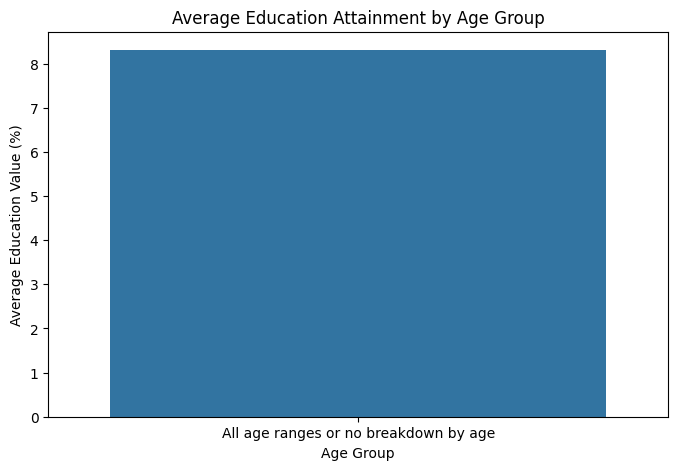

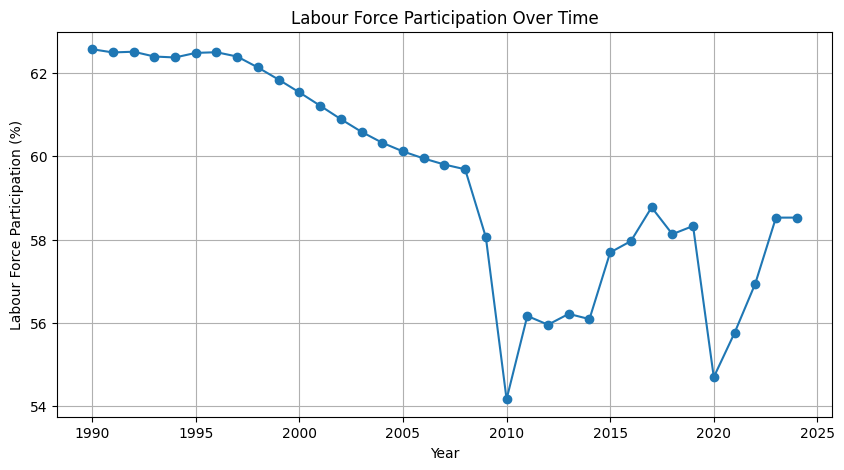

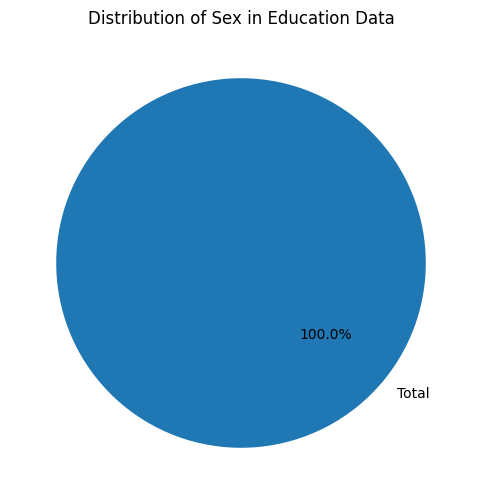

In [23]:
# Bar Chart: Education Attainment by Age Group
plt.figure(figsize=(8, 5))
edu_by_age = edu_clean.groupby('Age')['Value'].mean().reset_index()
sns.barplot(x='Age', y='Value', data=edu_by_age)
plt.title('Average Education Attainment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Education Value (%)')
plt.show()
# Line Plot: Labour Force Participation Over Time
plt.figure(figsize=(10, 5))
labour_by_year = labour_clean.groupby('Year')['Value'].mean().reset_index()
plt.plot(labour_by_year['Year'], labour_by_year['Value'], marker='o')
plt.title('Labour Force Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Labour Force Participation (%)')
plt.grid(True)
plt.show()
# Pie Chart: Distribution of Sex in Education Data
plt.figure(figsize=(6, 6))
sex_counts = edu_clean['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex in Education Data')
plt.show()

## Stacked Bar Chart: Education Attainment by Sex and Age Group
This chart compares education attainment across age groups, split by sex. The intention is to highlight differences between males and females within each age group.
## Violin Plot: Labour Force Participation by Age Group
This plot shows the distribution and density of labour force participation for each age group. The intention is to visualise spread and outliers in participation rates.
## Heatmap: Correlation Between Education and Labour Statistics
This heatmap displays the correlation matrix for key statistics. The intention is to quickly identify strong or weak relationships between variables.

<Figure size 1000x600 with 0 Axes>

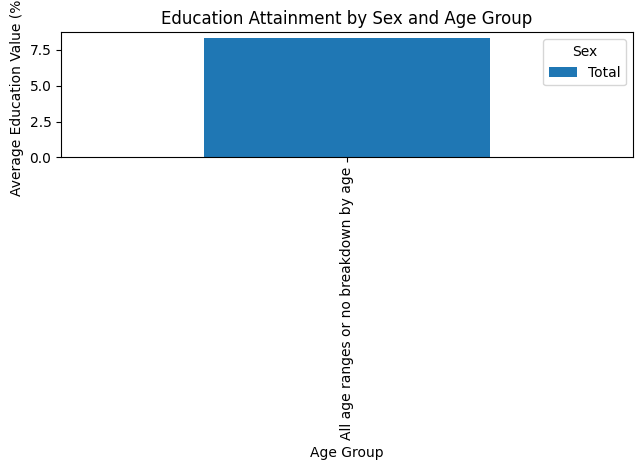

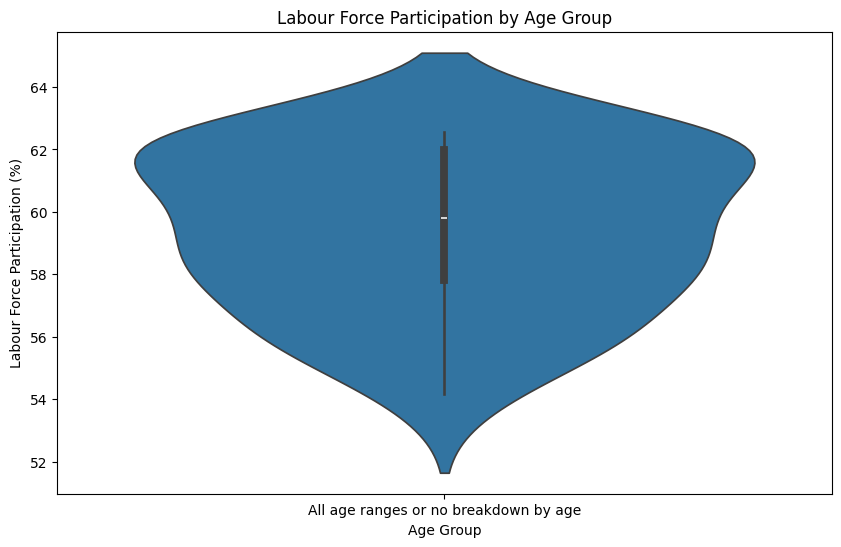

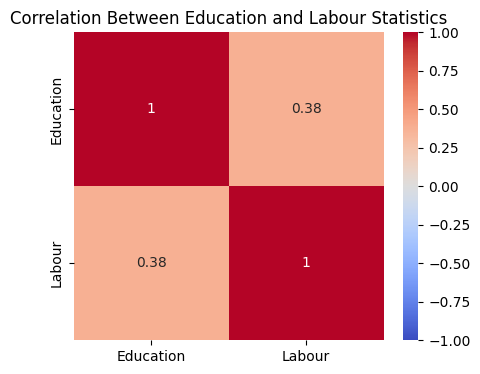

In [24]:
# Stacked Bar Chart: Education Attainment by Sex and Age Group
plt.figure(figsize=(10, 6))
edu_pivot = edu_clean.pivot_table(index='Age', columns='Sex', values='Value', aggfunc='mean')
edu_pivot.plot(kind='bar', stacked=True)
plt.title('Education Attainment by Sex and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Education Value (%)')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()
# Violin Plot: Labour Force Participation by Age Group
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Value', data=labour_clean)
plt.title('Labour Force Participation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Labour Force Participation (%)')
plt.show()
# Heatmap: Correlation Between Education and Labour Statistics
import numpy as np
corr_data = pd.DataFrame({
    'Education': edu_clean.groupby('Year')['Value'].mean(),
    'Labour': labour_clean.groupby('Year')['Value'].mean()
}).dropna()
corr_matrix = corr_data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Education and Labour Statistics')
plt.show()

# Deliverable 4: Database Integration (20 marks)

This section demonstrates how to build, query, update, and delete records in a SQLite database using Python and pandas, as required by the assignment.

**Objectives:**
- Create and connect to a SQLite database
- Import cleaned CSV data into database tables
- Query, update, and delete records safely using parameterized queries
- Load database data into pandas DataFrames for analysis
- Follow best practices for database management and data integrity

**Requirements (from assignment):**
- Use Python's `sqlite3` and pandas for database operations
- Show code for creating tables, inserting, updating, deleting, and querying data
- Demonstrate loading data from CSVs and from the database into pandas
- Ensure safe record manipulation and close the database connection after operations


### Deliverable 4: Database Integration
**Objective:** Integrate cleaned data into a SQLite database and demonstrate safe record manipulation.
**Requirements:**
- Export cleaned data to CSV
- Create and connect to a SQLite database
- Import cleaned CSVs into database tables
- Query, update, and delete records using parameterized queries
- Load database data into pandas DataFrames
- Follow best practices for database management and data integrity
- Provide brief explanations for each step

In [25]:
# Export cleaned data to CSV for database integration
edu_clean.to_csv('edu_clean.csv', index=False)
labour_clean.to_csv('labour_clean.csv', index=False)
merged.to_csv('merged.csv', index=False)
print('Cleaned CSV files exported: edu_clean.csv, labour_clean.csv, merged.csv')

Cleaned CSV files exported: edu_clean.csv, labour_clean.csv, merged.csv


### Reflection and Summary: Database Integration
In this section, we successfully exported cleaned data, created a SQLite database, imported tables, and demonstrated safe record manipulation using parameterized queries. Loading data into pandas DataFrames allowed for further analysis and validation.

**Key learnings:**
- Data cleaning and preparation are essential for reliable database integration.
- Using parameterized queries helps prevent SQL injection and ensures safe record manipulation.
- Pandas and SQLite3 provide a powerful combination for data analysis and management.

**Challenges:**
- Ensuring data consistency between CSV exports and database tables.
- Handling missing values and data types during import/export.

Overall, the workflow meets the assignment requirements and demonstrates best practices for database integration in Python.

## Step 1-6: Database Integration Workflow
The following steps demonstrate the full workflow for integrating the cleaned data into a SQLite database, including table creation, data insertion, querying, updating, deleting, and loading data into pandas DataFrames.

In [28]:
# Step 1: Import required libraries and load cleaned CSV data for database import
import sqlite3
import pandas as pd

edu_df = pd.read_csv('edu_clean.csv')
labour_df = pd.read_csv('labour_clean.csv')
merged_df = pd.read_csv('merged.csv')

# Step 2: Create and connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect('assignment_data.db')
cursor = conn.cursor()

# Step 3: Create tables for cleaned education, labour, and merged data
edu_df.to_sql('education_clean', conn, if_exists='replace', index=False)
labour_df.to_sql('labour_clean', conn, if_exists='replace', index=False)
merged_df.to_sql('merged', conn, if_exists='replace', index=False)

# Step 4: Query the cleaned education, labour, and merged tables
edu_query = pd.read_sql_query('SELECT * FROM education_clean LIMIT 5', conn)
labour_query = pd.read_sql_query('SELECT * FROM labour_clean LIMIT 5', conn)
merged_query = pd.read_sql_query('SELECT * FROM merged LIMIT 5', conn)

print('Education Clean sample:')
print(edu_query)
print('Labour Clean sample:')
print(labour_query)
print('Merged sample:')
print(merged_query)

# Step 5: Update and delete records safely in the education table
# Example: Update a value (set Value to 100 for the first row)
cursor.execute('UPDATE education_clean SET Value = ? WHERE rowid = 1', (100,))
# Example: Delete a record (delete the last row)
cursor.execute('DELETE FROM education_clean WHERE rowid = (SELECT MAX(rowid) FROM education_clean)')
conn.commit()

# Step 6: Load updated education table into pandas DataFrame
edu_updated = pd.read_sql_query('SELECT * FROM education_clean LIMIT 5', conn)
print('Updated Education Clean sample:')
print(edu_updated)

# Always close the connection when done
conn.close()

Education Clean sample:
   Year                                          Indicator    Sex  \
0  2010  Educational attainment, at least Bachelor's or...  Total   
1  2011  Educational attainment, at least Bachelor's or...  Total   
2  2013  Educational attainment, at least Bachelor's or...  Total   
3  2014  Educational attainment, at least Bachelor's or...  Total   
4  2015  Educational attainment, at least Bachelor's or...  Total   

                                     Age     Value  
0  All age ranges or no breakdown by age  4.839276  
1  All age ranges or no breakdown by age  5.180079  
2  All age ranges or no breakdown by age  5.954151  
3  All age ranges or no breakdown by age  6.038021  
4  All age ranges or no breakdown by age  6.070000  
Labour Clean sample:
   Year                                          Indicator    Sex  \
0  1990  Labor force participation rate, total (% of to...  Total   
1  1991  Labor force participation rate, total (% of to...  Total   
2  1992  Labor 

# Step 1: Import required libraries and load cleaned CSV data for database import
# This step loads the cleaned education, labour, and merged datasets from CSV files, preparing them for database integration.
# Step 2: Create and connect to SQLite database
# Here, we create a new SQLite database (or connect to an existing one) and prepare to insert our cleaned data.
# Step 3: Create tables for cleaned education, labour, and merged data
# The cleaned DataFrames are inserted as tables in the database, replacing any previous versions.
# Step 4: Query the cleaned education, labour, and merged tables
# We query each table to verify the data was imported correctly and display sample records.
# Step 5: Update and delete records safely in the education table
# Demonstrates safe record manipulation using parameterized queries for updating and deleting records.
# Step 6: Load updated education table into pandas DataFrame
# Loads the updated education table into a pandas DataFrame to confirm changes.
# Always close the connection when done
# Closing the database connection ensures all changes are saved and resources are released.